# 포아송분포

1837년, 프랑스의 수학자 포아송S.D. Poisson은 프러시사의 기병군단에서 매년 말발굽에 채여 죽는 병사의 수는 평균(u) 0.61의 일정한 분포를 따른다고 보고하였다. 그의 이름을 따서 포아송 분포(Poisson distribution)라고 명명된 이 분포는 특정 기간 또는 공간상에서 일정한 평균 발생률을 가지고 무작위로 발생하게 되는 희귀사건의 발생 건수에 관한 확률분포이다. 이 확률분포에 근거한 포아송 회구분석 Poisson regression analysis을 사용하면 일정한 기간 동안 어떤 인구집단의 특정 희귀사건의 발생률을 추정하고 예측할 수 있다. 일반적으로 전체 인구집단에서 5% 미만의 발생을 보이는 질병의 경우 포아송 희귀분석을 적용할 수 있으며 이를 통해 연도별 발생률의 변화와 함께 성별, 나이 등의 설명변수들이 질병의 발생률에 미치는 영향  등을 함께 알 수 있다. 로지스틱 회귀분석이 질병의 위험인자에 대한 연구이고, Cox의 비례위험모형이 생존율의 위험인자에 대한 연구라면, 포아송 회구분석은 질병의 발생률과 발생귤에 영향을 미치는 인자에 대한 연구이다. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

다음은 1993년부터 2011년까지 한 대학병원에서 관찰한 피부암의 발생에 대한 자료이다. 피부암의 발생률이 성별에 따라 차이가 있는지, 시간이 흐름에 따라 증가하는 경향이 있는지 검정하라.

필드설명
- year : 연도
- sex : 성별 (1=남자, 2=여자)
- case : 발생수
- total : 전체인구
- in_total : LN(total)

In [2]:
df = pd.read_csv('data/12_poisson_regression.csv')
df.head()

,year,sex,case,total,ln_total
0,1993,1,1,13783,9.53119
1,1993,2,1,13223,9.48971
2,1994,1,1,12666,9.44668
3,1994,2,2,14842,9.60522
4,1995,1,1,13932,9.54194


In [3]:
df.describe()

,year,sex,case,total,ln_total
count,38.000000,38.000000,38.000000,38.000000,38.000000
mean,2002.000000,1.500000,4.394737,18275.421053,9.799471
std,5.550749,0.506712,2.377137,3059.204813,0.169600
min,1993.000000,1.000000,1.000000,12666.000000,9.446680
25%,1997.250000,1.000000,2.250000,16509.750000,9.711700
50%,2002.000000,1.500000,4.500000,18079.500000,9.802530
75%,2006.750000,2.000000,6.000000,20067.000000,9.906823
max,2011.000000,2.000000,11.000000,24503.000000,10.106550


In [4]:
uniqSex = sorted(df['sex'].unique())
mean_sex = []
for elem in uniqSex:
    mean_sex.append(df[df['sex'] == elem]['case'].mean())
    
std_sex = []
for elem in uniqSex:
    std_sex.append(df[df['sex'] == elem]['case'].std())

mean_sex = np.array(mean_sex)
std_sex = np.array(std_sex)
mean_std = pd.DataFrame(mean_sex, columns=['mean'])
mean_std['SD'] = std_sex

print(mean_std)

       mean        SD
0  3.526316  1.806421
1  5.263158  2.600045


AttributeError: 'Rectangle' object has no property 'normed'

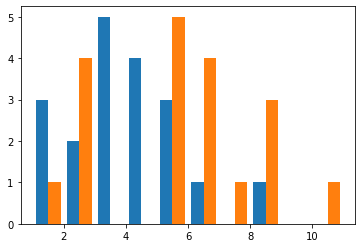

In [5]:
histData = []
for elem in uniqSex:
    histData.append(df[df['sex'] == elem]['case'].values)
    
plt.hist(tuple(histData), bins=10, normed = True, histtype='bar', label=map(lambda x: 'Sex' + str(x), uniqSex))
plt.legend()
plt.ylabel('Count')
plt.title("Histogram for eac sex")
plt.show()

In [40]:
import statsmodels.api as sm
from statsmodels.formula.api import poisson

ml = poisson('case ~ sex + year', data = df).fit()
ml.summary()

Optimization terminated successfully.
         Current function value: 1.754074
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                          Poisson Regression Results                          
==============================================================================
Dep. Variable:                   case   No. Observations:                   38
Model:                        Poisson   Df Residuals:                       35
Method:                           MLE   Df Model:                            2
Date:                Wed, 07 Aug 2019   Pseudo R-squ.:                  0.2181
Time:                        15:52:16   Log-Likelihood:                -66.655
converged:                       True   LL-Null:                       -85.244
Covariance Type:            nonrobust   LLR p-value:                 8.450e-09
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -160.2323     29.967     -5.347      0.000    -218.967    -101.497
sex            0.4005      0.158      2.537      0.011       0.091       0.710
year           0.0804      0.015      5.379      0.000       0.051       0.110
==============================================================================
"""

In [50]:
from statsmodels.genmod.generalized_estimating_equations import GEE
from statsmodels.genmod.cov_struct import (Exchangeable,
    Independence,Autoregressive)
from statsmodels.genmod.families import Poisson

fam = Poisson()
ind = Independence()
#ex = Exchangeable()
model1 = GEE.from_formula("case ~ sex + year", "case", data = df, cov_struct=ind, family=fam)
result1 = model1.fit()
print(result1.summary())

                               GEE Regression Results                              
Dep. Variable:                        case   No. Observations:                   38
Model:                                 GEE   No. clusters:                        9
Method:                        Generalized   Min. cluster size:                   1
                      Estimating Equations   Max. cluster size:                   8
Family:                            Poisson   Mean cluster size:                 4.2
Dependence structure:         Independence   Num. iterations:                     2
Date:                     Wed, 07 Aug 2019   Scale:                           1.000
Covariance type:                    robust   Time:                         15:56:29
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -160.2323     28.076     -5.707      0.000    -215.261    -105.204
sex    